### 01. Import all necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
import pylab as pl 
import sklearn 
from sklearn.cluster import KMeans

In [2]:
# Create path 
path = r'C:\Users\Megan\Documents\Analytics\Gun Violence Achievement 6'

In [3]:
# Import cleaned dataframe 

df = pd.read_csv(os.path.join(path, '02 Data','Raw Data','regression_data.csv'))

In [4]:
df.head()

,Unnamed: 0,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,Geographic_Region
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,East
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,West
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,East
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Middle
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,East


In [5]:
# Remove unnamed column 

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,Geographic_Region
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,East
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,West
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,East
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Middle
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,East


### 02. Prep data for KMeans analysis 

In [7]:
# Create subset without categorical variables 

df_kmeans = df[['#_killed','#_injured','n_guns_involved']]

In [8]:
df_kmeans.head()

,#_killed,#_injured,n_guns_involved
0,0,4,1.0
1,1,3,1.0
2,1,3,2.0
3,4,0,1.0
4,2,2,2.0


### 03. Use elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-243290.41005423845,
 -156622.79829774055,
 -117292.98701190701,
 -77238.44376222331,
 -53313.007390422295,
 -44779.73685765517,
 -36332.62307737377,
 -29591.72362552158,
 -22911.472200921566]

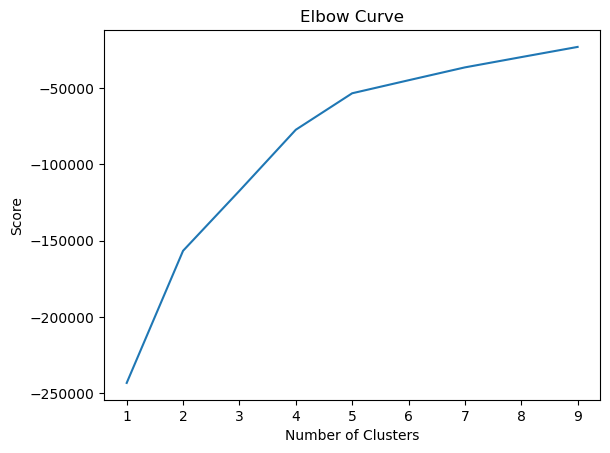

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 04. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### Based on the elbow chart, using 5 clusters would be a good idea, since the curve flattens out significantly for 6 or more clusters.  

### 05. Run the KMeans algorithm 

In [12]:
kmeans = KMeans(n_clusters = 5)

In [13]:
kmeans.fit(df_kmeans)

KMeans(n_clusters=5)

In [14]:
df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans)

C:\Users\Megan\AppData\Local\Temp\ipykernel_3816\254859967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans)


### 06. Attach a new column to dataframe with the clusters

In [15]:
df_kmeans['clusters'].value_counts()

2    92233
1    73149
0    48803
4    14569
3     2035
Name: clusters, dtype: int64

### 07. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

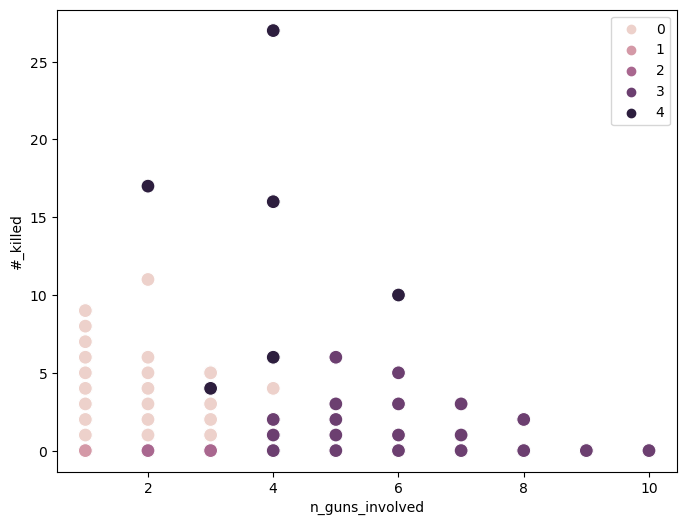

In [16]:
# Plot the clusters for the "n_guns_involved" and "#_killed" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_kmeans['n_guns_involved'], y=df_kmeans['#_killed'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('n_guns_involved') # Label x-axis.
plt.ylabel('#_killed') # Label y-axis.
plt.show()

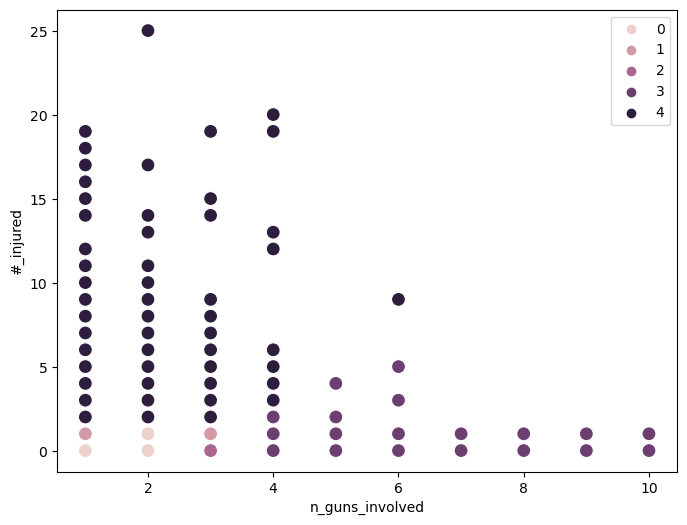

In [17]:
# Plot the clusters for the number of guns involved and the number injured 

plt.figure(figsize = (8,6))
ax = sns.scatterplot(x=df_kmeans['n_guns_involved'], y=df_kmeans['#_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('n_guns_involved')
plt.ylabel('#_injured')
plt.show()

### 08. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

#### These clusters don't really make much sense, except to show that the fewer guns that are involved in an incident, the higher the number of related deaths and injuries there are. I don't think the K-means is a good method for analyzing this data, since so many of the incidents have only 1-2 guns involved in the first place. 

### 09. Calculate the descriptive statistics for your clusters using groupby

In [18]:
df_kmeans.loc[df_kmeans['clusters'] == 4, 'cluster'] = 'black'
df_kmeans.loc[df_kmeans['clusters'] == 3, 'cluster'] = 'dark purple'
df_kmeans.loc[df_kmeans['clusters'] == 2, 'cluster'] = 'purple'
df_kmeans.loc[df_kmeans['clusters'] == 1, 'cluster'] = 'pink'
df_kmeans.loc[df_kmeans['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Megan\AppData\Local\Temp\ipykernel_3816\1814542066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans.loc[df_kmeans['clusters'] == 4, 'cluster'] = 'black'


In [19]:
df_kmeans.groupby('cluster').agg({'#_killed':['mean', 'median'], 
                         '#_injured':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median']})

#_killed        #_injured        n_guns_involved       
                 mean median      mean median            mean median
cluster                                                             
black        0.161439    0.0  2.399272    2.0        1.052097    1.0
dark purple  0.039312    0.0  0.074693    0.0        5.574939    5.0
light pink   1.120259    1.0  0.127287    0.0        1.025121    1.0
pink         0.000000    0.0  1.000000    1.0        1.017375    1.0
purple       0.000000    0.0  0.000000    0.0        1.084796    1.0

### 10. What could these steps mean and what could be done next in the analysis? 

#### According to the descriptive statistics, there is no relationship between the number of guns involved and the number of people killed or injured. Although the black cluster has the highest number of guns involved, it doesn't have the largest numbers of people killed/injured. The purple cluster has a relatively low number of guns involved, but the highest incidence of people killed. This shows there is no significant relationship between the variables. 